In [1]:
%matplotlib inline
%matplotlib notebook
#Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
#from stats import mean, median, mode, multi_mode

import warnings
warnings.filterwarnings('ignore')


In [2]:
indeed_data_df = pd.read_csv('./resources/01_indeed_job_dataset.csv')
indeed_data_df.head()

,id,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Engineer,https://www.indeed.com/rc/clk?jk=5a2a43234c789...,80001-99999,data_scientist,"['Microsoft SQL Server', 'Technical Writing', ...",6,Colorado Community Managed Care Network,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=df00df326efa1...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=fbb4b61d6a578...,140000-159999,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
3,3,Data Scientist,https://www.indeed.com/rc/clk?jk=8b80cf0fbff8c...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
4,4,Data Engineer,https://www.indeed.com/rc/clk?jk=051578f616806...,100000-119999,data_scientist,"['TS/SCI Clearance', 'Signal Processing', 'Mic...",3,DCS Corp,46.0,4.5,...,0,0,0,1,0,0,0,0,0,1


In [3]:
indeed_Jobtype_df = indeed_data_df[['id','Job_Type','Job_Title','Location','Company', 'Queried_Salary']]
indeed_Jobtype_df.head()

,id,Job_Type,Job_Title,Location,Company,Queried_Salary
0,0,data_scientist,Data Engineer,NaN,Colorado Community Managed Care Network,80001-99999
1,1,data_scientist,Data Scientist,CA,Cisco Systems,>160000
2,2,data_scientist,Data Scientist,CA,Cisco Systems,140000-159999
3,3,data_scientist,Data Scientist,CA,Cisco Systems,>160000
4,4,data_scientist,Data Engineer,FL,DCS Corp,100000-119999


In [4]:
# Total Number of Jobs Positions Availables
Tot_Jobs = pd.DataFrame({"Total Positions Open":[len(indeed_data_df['id'].unique())]})
Tot_Jobs

,Total Positions Open
0,5715


In [5]:
# Total Number of Jobs Positions by Job_Type
Job_counts = indeed_Jobtype_df["Job_Type"].value_counts()
Job_counts

data_scientist    2543
data_analyst      1793
data_engineer     1379
Name: Job_Type, dtype: int64

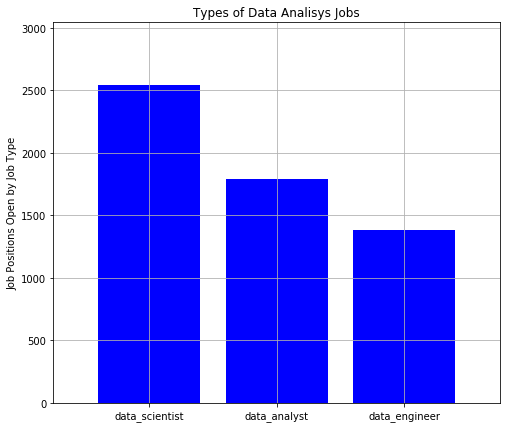

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(8,7))
counts = [2543, 1793,1379]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='b', align="center")
plt.ylim(0, max(counts)+ 500)
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["data_scientist", "data_analyst", "data_engineer"])
plt.title("Types of Data Analisys Jobs")
plt.ylabel("Job Positions Open by Job Type")

plt.savefig("Output & Graph/Types of Data Analysis Jobs.jpg")
plt.grid()
plt.show()
plt.tight_layout()

In [7]:
#Group Job Type %
total_jobs = len(indeed_Jobtype_df)
Job_perc = Job_counts/total_jobs*100
#print(Job_perc)
Job_percp = Job_counts/total_jobs
Job_percp = Job_percp.map(lambda n: '{:.2%}'.format(n))
Job_percp

data_scientist    44.50%
data_analyst      31.37%
data_engineer     24.13%
Name: Job_Type, dtype: object

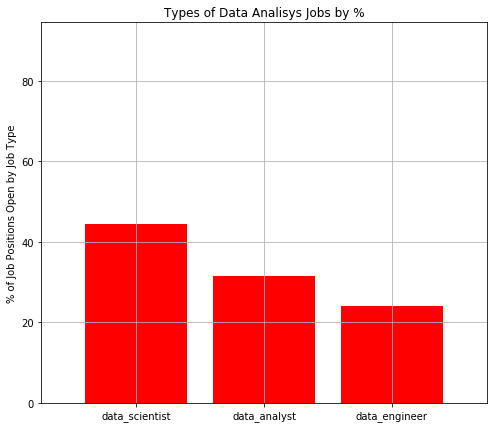

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(8,7))
counts = [44.5, 31.4,24.13]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='r', align="center")
plt.ylim(0, max(counts)+ 50)
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["data_scientist", "data_analyst", "data_engineer"])
plt.title("Types of Data Analisys Jobs by %")
plt.ylabel("% of Job Positions Open by Job Type")
plt.savefig("Output & Graph/Types of Data Analysis Jobs by %.jpg")
plt.grid()
plt.show()
plt.tight_layout()

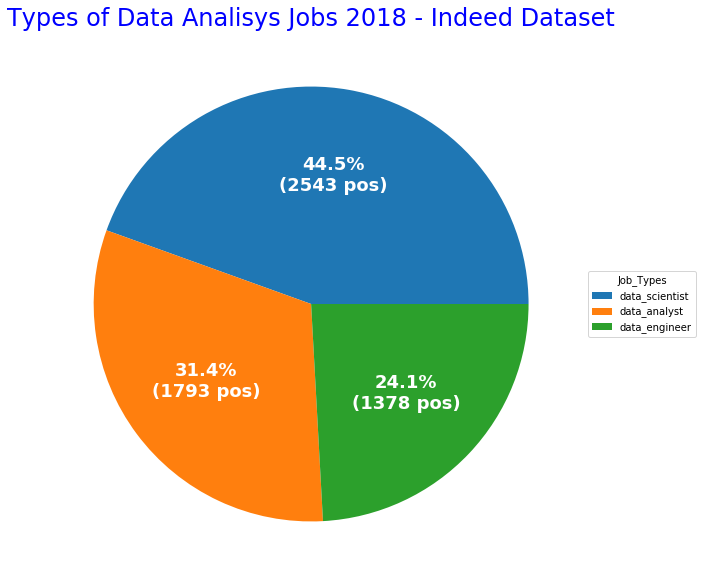

In [9]:
fig, ax = plt.subplots(figsize=(60, 10), subplot_kw=dict(aspect="equal"))

jobs = ["2543 data_scientist", "1793 data_analyst", "1379 data_engineer"]

data = [float(x.split()[0]) for x in jobs]
counts = [x.split()[-1] for x in jobs]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} pos)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, counts,
          title="Job_Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=18, weight="bold")

ax.set_title("Types of Data Analisys Jobs 2018 - Indeed Dataset", size=24, color='b')
plt.savefig("Output & Graph/Types of Data Analysis Jobs &%2018.jpg")
plt.show()


In [10]:
# Group by Salary
by_Salary_df = indeed_Jobtype_df.loc[:, ["Job_Type","Queried_Salary"]]
by_Salary_df.head()

,Job_Type,Queried_Salary
0,data_scientist,80001-99999
1,data_scientist,>160000
2,data_scientist,140000-159999
3,data_scientist,>160000
4,data_scientist,100000-119999


In [11]:
Job_salary_df = by_Salary_df["Queried_Salary"].value_counts()
Job_salary_df

100000-119999    1394
120000-139999    1292
80001-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [12]:
grouped_df = by_Salary_df.groupby(['Job_Type','Queried_Salary'])['Job_Type']
avg_job_df = grouped_df.count()
avg_job_df

Job_Type        Queried_Salary
data_analyst    100000-119999     301
                120000-139999     501
                140000-159999     401
                80001-99999       195
                <80000            201
                >160000           194
data_engineer   100000-119999     274
                120000-139999     337
                140000-159999     308
                80001-99999       181
                <80000            118
                >160000           161
data_scientist  100000-119999     819
                120000-139999     454
                140000-159999     164
                80001-99999       577
                <80000            469
                >160000            60
Name: Job_Type, dtype: int64

In [13]:
# Data Analysys Salaries

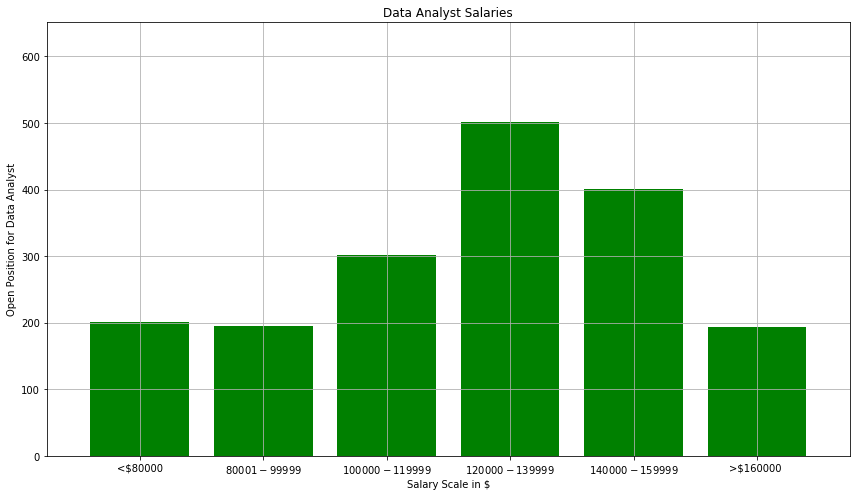

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
counts = [201, 195, 301 , 501, 401, 194]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='g', align="center")
plt.ylim(0, max(counts)+ 150)
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["<$80000", "$80001-$99999","$100000-$119999", 
                            "$120000-$139999", "$140000-$159999", ">$160000 "])
plt.title("Data Analyst Salaries")
plt.ylabel("Open Position for Data Analyst")
plt.xlabel("Salary Scale in $")
plt.grid()
plt.tight_layout()
plt.savefig("Output & Graph/Data Analyst Salary.jpg")
plt.show()

In [15]:
# Data Engineer Salaries

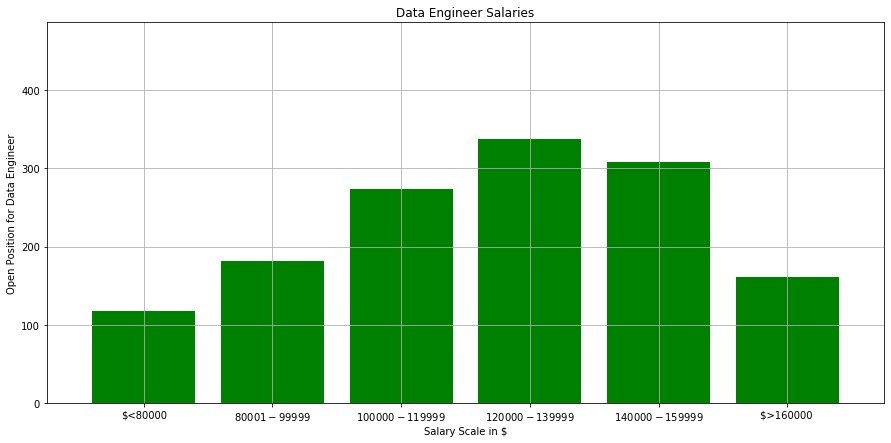

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
counts = [118, 181, 273 , 337, 308, 161]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='g', align="center")
plt.ylim(0, max(counts)+ 150)
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["$<80000", "$80001-$99999","$100000-$119999", 
                            "$120000-$139999", "$140000-$159999", "$>160000 "])
plt.title("Data Engineer Salaries")
plt.ylabel("Open Position for Data Engineer")
plt.xlabel("Salary Scale in $")
plt.grid()
plt.savefig("Output & Graph/Data Engineer Salary.jpg")
plt.show()
plt.tight_layout()

In [17]:
# Data Scientist Salaries

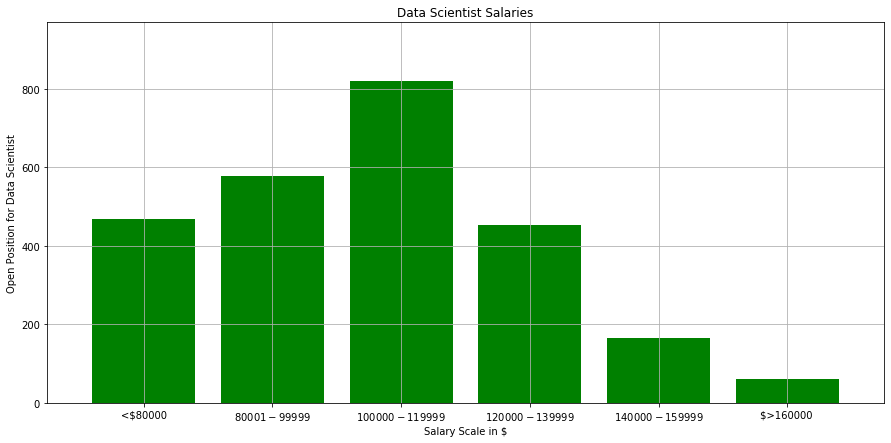

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
counts = [469, 577,819 , 454, 164, 60]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='g', align="center")
plt.ylim(0, max(counts)+ 150)
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["<$80000", "$80001-$99999","$100000-$119999", "$120000-$139999", "$140000-$159999", "$>160000 "])
plt.title("Data Scientist Salaries")
plt.ylabel("Open Position for Data Scientist")
plt.xlabel("Salary Scale in $")
plt.savefig("Output & Graph/Data Scientist Salary.jpg")
plt.grid()
plt.show()
plt.tight_layout()

In [19]:
df = pd.read_csv('./resources/01_indeed_job_dataset.csv')
df.head()

,id,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Engineer,https://www.indeed.com/rc/clk?jk=5a2a43234c789...,80001-99999,data_scientist,"['Microsoft SQL Server', 'Technical Writing', ...",6,Colorado Community Managed Care Network,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=df00df326efa1...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=fbb4b61d6a578...,140000-159999,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
3,3,Data Scientist,https://www.indeed.com/rc/clk?jk=8b80cf0fbff8c...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
4,4,Data Engineer,https://www.indeed.com/rc/clk?jk=051578f616806...,100000-119999,data_scientist,"['TS/SCI Clearance', 'Signal Processing', 'Mic...",3,DCS Corp,46.0,4.5,...,0,0,0,1,0,0,0,0,0,1


In [20]:
# Group by Salary
by_Salary_df = indeed_Jobtype_df.loc[:, ["Job_Type","Queried_Salary"]]
by_Salary_df.head()

,Job_Type,Queried_Salary
0,data_scientist,80001-99999
1,data_scientist,>160000
2,data_scientist,140000-159999
3,data_scientist,>160000
4,data_scientist,100000-119999


In [21]:
Job_salary_df = by_Salary_df["Queried_Salary"].value_counts()
Job_salary_df

100000-119999    1394
120000-139999    1292
80001-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [22]:
grouped_df = by_Salary_df.groupby(['Job_Type','Queried_Salary'])['Job_Type']
avg_job_df = grouped_df.count()
avg_job_df

Job_Type        Queried_Salary
data_analyst    100000-119999     301
                120000-139999     501
                140000-159999     401
                80001-99999       195
                <80000            201
                >160000           194
data_engineer   100000-119999     274
                120000-139999     337
                140000-159999     308
                80001-99999       181
                <80000            118
                >160000           161
data_scientist  100000-119999     819
                120000-139999     454
                140000-159999     164
                80001-99999       577
                <80000            469
                >160000            60
Name: Job_Type, dtype: int64

In [23]:
# Salary Mean
Salary_mean_axis = np.array(["$65000", "$90000", "$110000", "$130000", "$150000", "$170000"])
data_analyst_axis = np.array([201, 195, 301, 501, 401, 194])
data_engineer_axis = np.array([118, 181, 274, 337, 308, 161])
data_scientist_axis = np.array([469, 577, 819, 454, 164, 60])

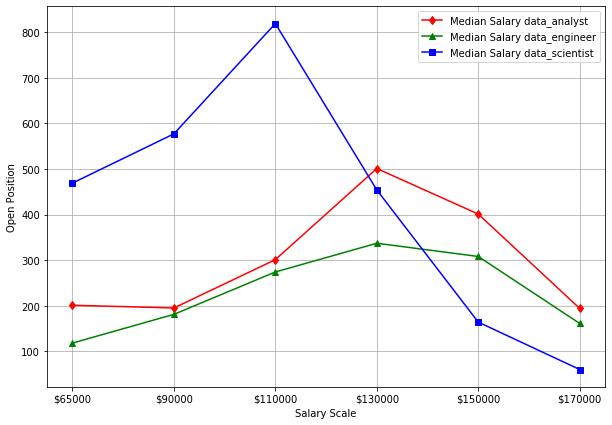

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel("Salary Scale")
plt.ylabel("Open Position")
DangerDrop, = plt.plot(Salary_mean_axis, data_analyst_axis , 
                       color='red', label="Median Salary data_analyst", marker='d')
RailGun, = plt.plot(Salary_mean_axis, data_engineer_axis , 
                    color='green', label="Median Salary data_engineer", marker='^')
RailGun, = plt.plot(Salary_mean_axis, data_scientist_axis , 
                    color='blue', label="Median Salary data_scientist", marker='s')
plt.legend(loc="upper right")
plt.savefig("Output & Graph/Salary mean.jpg")
plt.grid()
plt.show()
plt.tight_layout()

In [25]:
#TTest

# Total Number of Jobs Positions Availables
Tot_Jobs = pd.DataFrame({"Total Positions Open":[len(indeed_data_df['id'].unique())]})
Tot_Jobs

,Total Positions Open
0,5715


In [26]:
Tot_Jobs["Total Positions Open"]


0    5715
Name: Total Positions Open, dtype: int64

In [27]:
def gendata(loc=0):
    population = stats.norm.rvs(size=Tot_Jobs["Total Positions Open"])
    sample = stats.norm.rvs(loc=loc, size=300)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="Open Positions")
    plt.scatter(range(len(sample)), sample, label="Sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="Open Positions")
    plt.hist(sample, 20, density=True, alpha=0.7, label="Sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

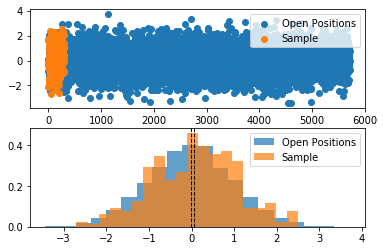

In [28]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [29]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=1.5353639154016905, pvalue=0.12575192467623744)

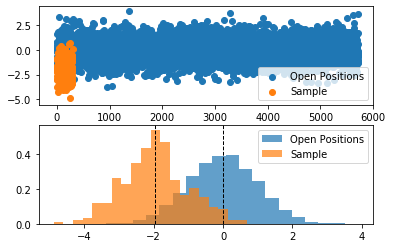

In [30]:
population, sample = gendata(loc=-2)

In [31]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-35.5663820255008, pvalue=1.9287316219323076e-109)